In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
df=pd.read_csv('student_info.csv')    #reading csv file

In [4]:
df

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19
...,...,...
195,7.53,81.67
196,8.56,84.68
197,8.94,86.75
198,6.60,78.05


In [5]:
df.head()

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


In [6]:
df.tail()

,study_hours,student_marks
195,7.53,81.67
196,8.56,84.68
197,8.94,86.75
198,6.60,78.05
199,8.35,83.50


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    195 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [8]:
df.describe()

,study_hours,student_marks
count,195.000000,200.00000
mean,6.995949,77.93375
std,1.253060,4.92570
min,5.010000,68.57000
25%,5.775000,73.38500
50%,7.120000,77.71000
75%,8.085000,82.32000
max,8.990000,86.99000


In [9]:
df.shape

(200, 2)

In [10]:
x=df.study_hours

In [11]:
y=df.student_marks

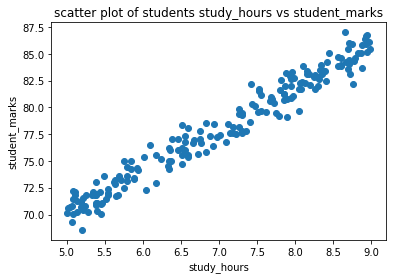

In [12]:
plt.scatter(x,y)
plt.xlabel('study_hours')
plt.ylabel('student_marks')
plt.title('scatter plot of students study_hours vs student_marks')
plt.show()

# Data cleaning for ML

In [13]:
df.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

In [14]:
df.mean()

study_hours       6.995949
student_marks    77.933750
dtype: float64

In [15]:
df=df.fillna(df.mean())

In [16]:
df.isnull().sum()

study_hours      0
student_marks    0
dtype: int64

# Split data

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    200 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [18]:
X=df.drop('student_marks' ,axis='columns')

In [19]:
Y=df.drop('study_hours',axis='columns')

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)
print('Shape of X train = ',X_train.shape)
print('Shape of Y train = ',Y_train.shape)
print('Shape of X test = ',X_test.shape)
print('Shape of Y test = ',X_test.shape)

Shape of X train =  (140, 1)
Shape of Y train =  (140, 1)
Shape of X test =  (60, 1)
Shape of Y test =  (60, 1)



# Select a model and train

In [22]:
#y=mx+c
from sklearn.linear_model import LinearRegression
LR=LinearRegression()

In [23]:
LR.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [24]:
LR.coef_

array([[3.94533471]])

In [25]:
LR.intercept_

array([50.21638913])

In [26]:
Y_pred=LR.predict(X_test)

In [27]:
Y_pred

array([[77.81774842],
       [82.41032035],
       [76.49231829],
       [85.60604146],
       [71.48174321],
       [75.19035783],
       [73.41495721],
       [75.93997143],
       [75.26926453],
       [85.25096134],
       [73.25714383],
       [81.97633353],
       [81.38453332],
       [70.2192361 ],
       [81.54234671],
       [75.26926453],
       [81.30562663],
       [71.24502313],
       [81.0294532 ],
       [73.5727706 ],
       [82.52868039],
       [70.49540953],
       [78.58334568],
       [83.08102725],
       [83.15993394],
       [83.31774733],
       [70.37704949],
       [77.55755866],
       [84.14626762],
       [76.09778482],
       [71.48174321],
       [73.05987709],
       [70.49540953],
       [84.89588122],
       [81.58180006],
       [76.84739841],
       [77.81774842],
       [72.38917019],
       [81.58180006],
       [80.00366618],
       [72.78370366],
       [71.48174321],
       [75.90051808],
       [71.04775639],
       [75.70325135],
       [82

In [28]:
pd.DataFrame(np.c_[X_test,Y_test,Y_pred],columns=[ 'study_hours','students_marks_original','students_marks_predicted'])

,study_hours,students_marks_original,students_marks_predicted
0,6.995949,76.83,77.817748
1,8.160000,83.15,82.410320
2,6.660000,76.63,76.492318
3,8.970000,86.12,85.606041
4,5.390000,71.87,71.481743
5,6.330000,74.49,75.190358
6,5.880000,73.40,73.414957
7,6.520000,76.20,75.939971
8,6.350000,76.19,75.269265
9,8.880000,83.64,85.250961


# Fine-tune your model

In [29]:
LR.score(X_test,Y_test)  #accuracy

0.9562133973167314

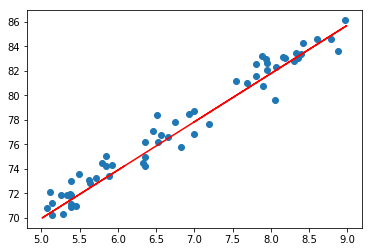

In [30]:
plt.scatter(X_test,Y_test)
plt.plot(X_train,LR.predict(X_train),color = 'r')
plt.show()


# Present your solution

# Save ML Model

In [30]:
 import joblib


In [31]:
joblib.dump(LR,'students_marks_predictor_model.pkl')

['students_marks_predictor_model.pkl']

In [32]:
model=joblib.load('students_marks_predictor_model.pkl')  
#onlyimport this 1kb file and run,comtains values of m,c etc

In [33]:
model.predict(6)[0][0]     #give input and get output

74.06883681604586